# Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [53]:
data = pd.read_excel(r'C:\Users\Farhan\Downloads\iris.xls')

In [54]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [56]:
data.shape

(150, 5)

In [57]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking for Null Values

In [58]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Filling the Null Values

In [59]:
data['SL'].fillna(data['SL'].median(), inplace=True)
data['SW'].fillna(data['SW'].median(), inplace=True)
data['PL'].fillna(data['PL'].median(), inplace=True)

In [60]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [61]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Checking for outlliers

In [62]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

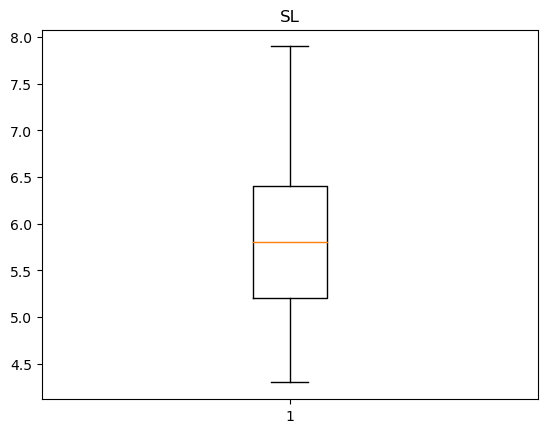

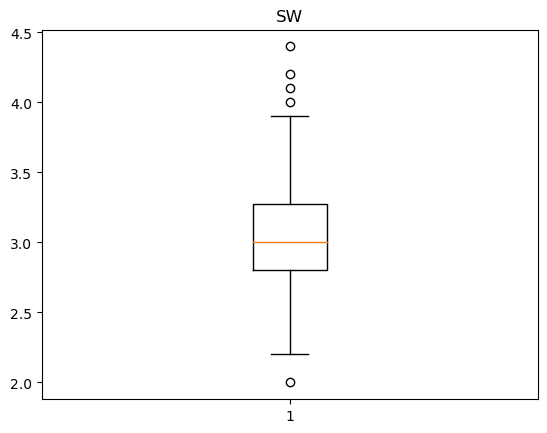

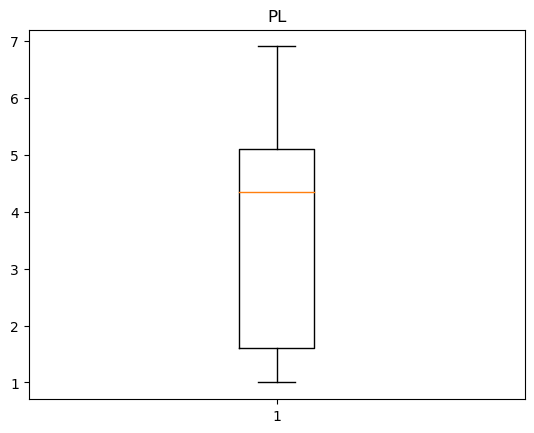

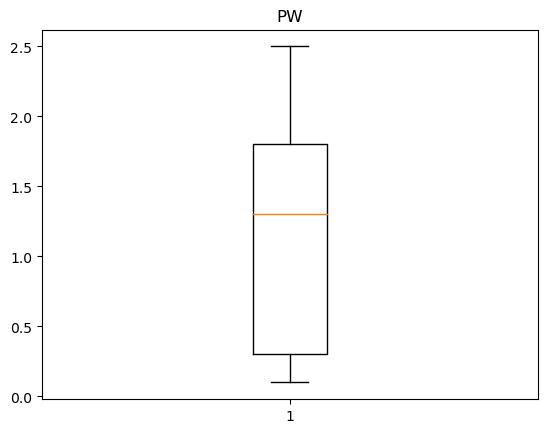

In [63]:
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

# Removing Outliers

In [64]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')

In [65]:
IQR = Q3 - Q1
IQR

0.4500000000000002

In [66]:
low_lim = Q1-1.5*IQR
low_lim

2.1249999999999996

In [67]:
up_lim = Q2+1.5*IQR
up_lim

3.6750000000000003

In [68]:
outlier = []
for x in data['SW']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [69]:
outlier

[3.9, 4.0, 4.4, 3.9, 3.8, 3.8, 3.7, 4.1, 4.2, 3.8, 3.8, 3.7, 2.0, 3.8, 3.8]

In [70]:
data['SW']=np.where(data['SW']>up_lim,up_lim,np.where(data['SW']<low_lim,low_lim,data['SW']))

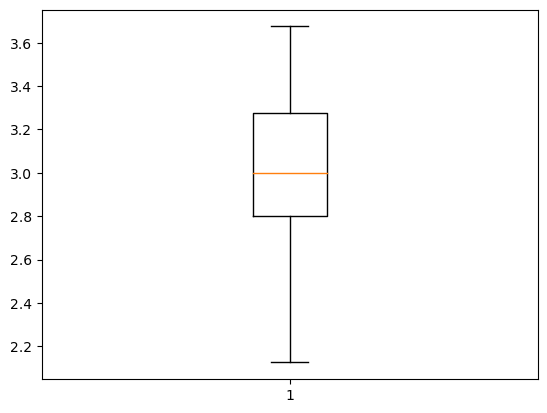

In [71]:
plt.figure()
plt.boxplot(data['SW'])
plt.show()

# Encoding the Data

In [72]:
from sklearn import preprocessing
en = preprocessing.LabelEncoder()
data['Classification'] = en.fit_transform(data['Classification'])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


#### Specifying target and feature columns

In [73]:
y = data['Classification']
x = data.drop(['Classification'],axis=1)

# 1. Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
lo_clf = LogisticRegression()
model1 = lo_clf.fit(x_train,y_train)

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [76]:
y_pred = model1.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [78]:
print('accuracy is: ',round(accuracy_score(y_test,y_pred),4))
print('Precision is: ',round(precision_score(y_test,y_pred,average='micro'),4))
print('recall score is: ',round(recall_score(y_test,y_pred,average='micro'),4))
print('f1 score is: ',round(f1_score(y_test,y_pred,average='micro'),4))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


In [79]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# 2. KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

neighbors = np.arange(3,15)
metric_k = []
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    model_knn = classifier.fit(x_train, y_train)
    y_pred_knn  = model_knn.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

Text(0, 0.5, 'Accuracy')

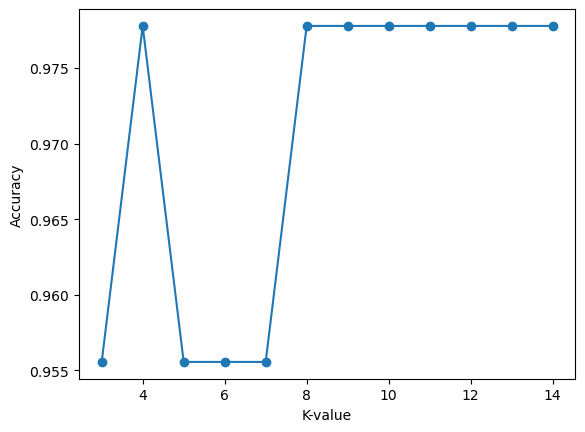

In [81]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K-value')
plt.ylabel('Accuracy')

In [82]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski')
classifier.fit(x_train, y_train)
y_pred  = classifier.predict(x_test)

In [83]:
print('accuracy is: ',accuracy_score(y_test,y_pred))
print('Precision is: ',precision_score(y_test,y_pred,average='micro'))
print('recall score is: ',recall_score(y_test,y_pred,average='micro'))
print('f1 score is: ',f1_score(y_test,y_pred,average='micro'))

accuracy is:  0.9777777777777777
Precision is:  0.9777777777777777
recall score is:  0.9777777777777777
f1 score is:  0.9777777777777777


In [84]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

# 3. SVM

In [85]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(x_train,y_train)

SVC(kernel='linear')

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [87]:
y_pred_svm = svm_clf.predict(x_test)

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


print('accuracy is: ',accuracy_score(y_test,y_pred_svm))
print('Precision is: ',precision_score(y_test,y_pred_svm,average='micro'))
print('recall score is: ',recall_score(y_test,y_pred_svm,average='micro'))
print('f1 score is: ',f1_score(y_test,y_pred_svm,average='micro'))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


In [89]:
confusion_matrix(y_test,y_pred_svm)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

# 4. Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [92]:
y_pred_dt = dt_clf.predict(x_test)

In [93]:
print('accuracy is: ',accuracy_score(y_test,y_pred_dt))
print('Precision is: ',precision_score(y_test,y_pred_dt,average='micro'))
print('recall score is: ',recall_score(y_test,y_pred_dt,average='micro'))
print('f1 score is: ',f1_score(y_test,y_pred_dt,average='micro'))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


In [94]:
confusion_matrix(y_test,y_pred_dt)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

# 5. Random Forest Algorithm

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [97]:
y_pred_rf = rf_clf.predict(x_test)

In [98]:
print('accuracy is: ',accuracy_score(y_test,y_pred_rf))
print('Precision is: ',precision_score(y_test,y_pred_rf,average='micro'))
print('recall score is: ',recall_score(y_test,y_pred_rf,average='micro'))
print('f1 score is: ',f1_score(y_test,y_pred_rf,average='micro'))

accuracy is:  1.0
Precision is:  1.0
recall score is:  1.0
f1 score is:  1.0


In [99]:
confusion_matrix(y_test,y_pred_rf)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

# Conclusion

Taking accuracy values of all the models Decision tree And Random Forest models have the best accuracy